In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [96]:
df = pd.read_csv('production-data.csv', sep=',')

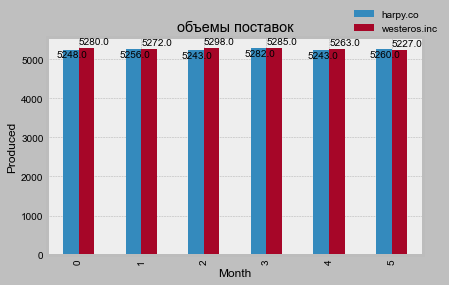

In [97]:
df['dur'] = df['report.date'] - df['production.date']

H = 'harpy.co'
W = 'westeros.inc'
prods = df[df['dur'] == 0]
prod_H = np.array(prods[prods['supplier'] == H].groupby(['production.date'])['produced'].aggregate(sum))
prod_W = np.array(prods[prods['supplier'] == W].groupby(['production.date'])['produced'].aggregate(sum))
a = (np.array([prod_H, prod_W])).transpose()
p = pd.DataFrame(data=a)
p.columns = [H, W]
bar_width = 0.35
ax = p.plot(kind='bar')
# ax.set_xticklabels(range(1, 7))
#plt.legend(loc=4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.)
plt.title('объемы поставок')
plt.ylabel('Produced')
plt.xlabel('Month')
for x, y in enumerate(prod_H):
    plt.text(x - bar_width, y - 200, '%s' % y)
for x, y in enumerate(prod_W):
    plt.text(x, y + 100, '%s' % y)
plt.show() 

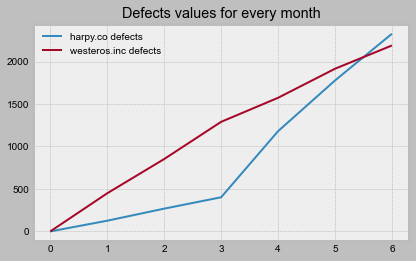

In [98]:
supplier_report = df.groupby(['supplier', 'report.date'])
defects_sum = supplier_report['defects'].sum()
harpy_creation_defects = np.array(defects_sum['harpy.co'])
westeros_creation_defects = np.array(defects_sum['westeros.inc'])
de = pd.DataFrame(data=(np.array([harpy_creation_defects, westeros_creation_defects])).transpose())
de.columns = ['harpy.co defects', 'westeros.inc defects']
de.plot(kind='line')
plt.title('Defects values for every month')
plt.show() 

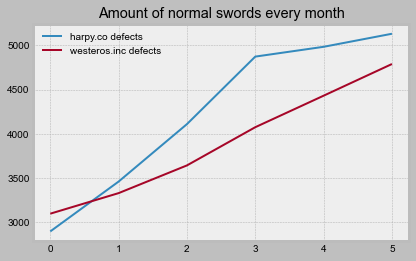

In [99]:
supplier_creation = df.groupby(['supplier', 'production.date']);
summarize = supplier_creation.agg([np.sum])
harpy_normal_swords = np.array(summarize.loc['harpy.co']['produced']['sum']) - np.array(
    summarize.loc['harpy.co']['defects']['sum'])
westeros_normal_swords = np.array(summarize.loc['westeros.inc']['produced']['sum']) - np.array(
    summarize.loc['westeros.inc']['defects']['sum'])
am = pd.DataFrame(data=(np.array([harpy_normal_swords, westeros_normal_swords])).transpose())
am.columns = ['harpy.co defects', 'westeros.inc defects']
am.plot(kind='line')
plt.title('Amount of normal swords every month')
plt.show() 

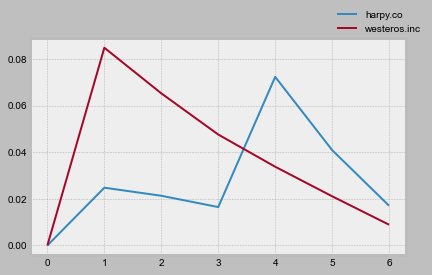

In [100]:
dfhap = df[df['supplier'] == 'harpy.co']
dfwes = df[df['supplier'] == 'westeros.inc']
hapAllProd = sum(dfhap['produced'])
wesAllProd = sum(dfwes['produced'])
hapAllDef = sum(dfhap['defects'])
wesAllDef = sum(dfwes['defects'])
dfhap1 = dfhap[dfhap['report.date'] - dfhap['production.date'] == 1]
dfhap1avgdef = sum(dfhap1['defects']) / hapAllProd
dfhaps = []
dfwess = []
for i in range(7):
    dfhaps.append(dfhap[dfhap['report.date'] - dfhap['production.date'] == i])
    dfwess.append(dfwes[dfwes['report.date'] - dfwes['production.date'] == i])
hapMonthDef = []
wesMonthDef = []
for i in range(7):
    hapMonthDef.append(sum(dfhaps[i]['defects']) / hapAllProd)
    wesMonthDef.append(sum(dfwess[i]['defects']) / wesAllProd)
plt.plot(range(7), hapMonthDef,label="harpy.co")
plt.plot(range(7), wesMonthDef,label="westeros.inc")
plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.)
plt.show() 